In [10]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [44]:
bream_df = df.loc[df['Species'] == 'Bream'] # 종이 도미인 데이터만 뽑

# bream_df
bream_length = bream_df['Length2'].tolist() # 길이 데이터를 리스트로
bream_weight = bream_df['Weight'].tolist() # 무게 데이터를 리스트로

In [36]:
# bream_length

Text(0, 0.5, 'weight')

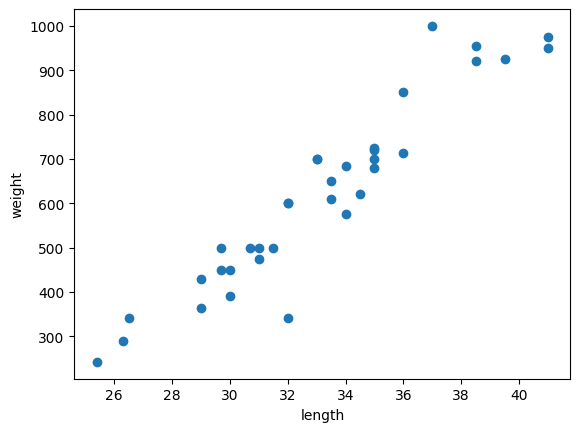

In [37]:
# 과학 계산용 그래프 그리는 패키지 = matplotlib
import matplotlib.pyplot as plt
# 맷플롯립을 앞으로 plt로 사용할겡

# plot : 선, bar : 막대, scatter : 산점도
plt.scatter(bream_length, bream_weight) # 길이(x)와 무게(y)로 산점도 그려줭
plt.xlabel('length')
plt.ylabel('weight')

# x축 y축에 이름을 넣고 싶다면
# plt.xlabel(''), plt.ylabel('')값 설정해주기

In [46]:
smelt_df = df.loc[df['Species'] == 'Smelt'] # 빙어 데이터만 뽑
# smelt_df.head()


smelt_length = smelt_df['Length2'].tolist() # 빙어 길이를 리스트로
smelt_weight = smelt_df['Weight'].tolist() # 빙어 무게를 리스트로


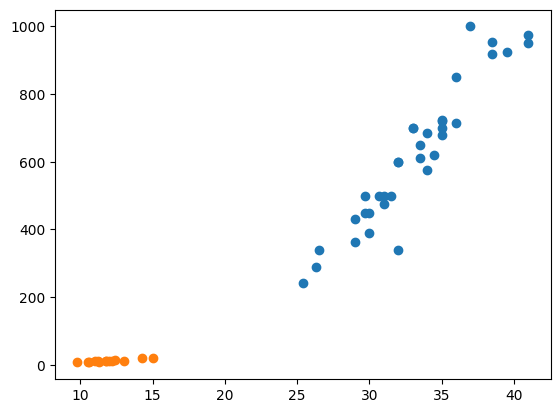

In [39]:
# 비교할 2개의 데이터를 함께 산점도로 표시하려면 scatter를 병기하면 됨
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

In [40]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [55]:
fish_data = [[l, w] for l, w in zip(length, weight)]

# zip() 함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환
# length와 weight이 각각 l, w에 할당되고
# [l, w]가 하나의 원소로 구성된 리스트를 만들어 줌

fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [56]:
fish_target = [1] * len(bream_weight) + [0] * len(smelt_weight)
# fish_target

fish_target[:5]

[1, 1, 1, 1, 1]

In [51]:
from sklearn.neighbors import KNeighborsClassifier
# 패키지나 모듈 전체가 아닌 특정 클래스만 임포트 가능

In [52]:
kn = KNeighborsClassifier() # 클래스 객체 만들어줌

In [57]:
kn.fit(fish_data, fish_target)
# fish_data와 fish_target을 한줄씩 매칭하여 러닝시킴

KNeighborsClassifier()

In [59]:
kn.score(fish_data, fish_target)
# 모델을 평가하는 메서드 (정확도)

1.0

In [60]:
kn.predict([[30, 600]])
# predict = 새로운 데이터의 정답예측 메서드
# 길이 30, 무게 600인 생선은 무엇일까?
# 반환된 값은 1, 도미로 예측

array([1])

In [61]:
kn.predict([[10, 20]])

array([0])

In [62]:
kn49 = KNeighborsClassifier(n_neighbors=49)
# 가장 가까운 데이터 수의 기본값은 5

In [67]:
kn49.fit(fish_data, fish_target)
# kn49.score(fish_data, fish_target)
# 가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델을 만들 경우
# 도미가 35마리이므로 무조건 도미가 나옴 -> 정확도 떨어짐

KNeighborsClassifier(n_neighbors=49)

In [66]:
kn49.predict([[25, 100]])

array([1])

In [45]:
35/49

0.7142857142857143